In [1]:
import pandas as pd
import random
import networkx as nx
import matplotlib.pyplot as plt
import pickle
from pyvis.network import Network
import community.community_louvain as community_louvain
from tqdm import tqdm

Importation des données : 

In [2]:
project = pd.read_csv("../Data/CSV/Projects/project.csv", sep=";")

In [3]:
organization = pd.read_csv("../Data/CSV/Projects/organization.csv", sep=";")

Point positif des CSV c'est qu'ils semblent plus propre que les JSON (voir Publications) et les columnes sont dans le bon ordre.

In [4]:
print(project.shape)
print(organization.shape)

(35381, 20)
(177190, 25)


In [5]:
project.columns

Index(['id', 'acronym', 'status', 'title', 'startDate', 'endDate', 'totalCost',
       'ecMaxContribution', 'legalBasis', 'topics', 'ecSignatureDate',
       'frameworkProgramme', 'masterCall', 'subCall', 'fundingScheme',
       'nature', 'objective', 'contentUpdateDate', 'rcn', 'grantDoi'],
      dtype='object')

In [6]:
organization.columns

Index(['projectID', 'projectAcronym', 'organisationID', 'vatNumber', 'name',
       'shortName', 'SME', 'activityType', 'street', 'postCode', 'city',
       'country', 'nutsCode', 'geolocation', 'organizationURL', 'contactForm',
       'contentUpdateDate', 'rcn', 'order', 'role', 'ecContribution',
       'netEcContribution', 'totalCost', 'endOfParticipation', 'active'],
      dtype='object')

On vérifie si on a autant de projectID unique que de ligne dans notre table *project*. Et c'est le cas ! 

In [7]:
len(organization["projectID"].unique())

35381

In [8]:
project.head(1)

,id,acronym,status,title,startDate,endDate,totalCost,ecMaxContribution,legalBasis,topics,ecSignatureDate,frameworkProgramme,masterCall,subCall,fundingScheme,nature,objective,contentUpdateDate,rcn,grantDoi
0,817296,eDCaseMAN,CLOSED,"Defendable legal cases through an affordable, ...",2018-05-01,2018-09-30,71429,50000,H2020-EU.2.3.,EIC-SMEInst-2018-2020,2018-05-02,H2020,H2020-EIC-SMEInst-2018-2020,H2020-SMEInst-2018-2020-1,SME-1,NaN,"""Electronic discovery (known as e-discovery) i...",2022-08-10 13:07:21,217713,10.3030/817296


In [9]:
organization.head(1)

,projectID,projectAcronym,organisationID,vatNumber,name,shortName,SME,activityType,street,postCode,...,contactForm,contentUpdateDate,rcn,order,role,ecContribution,netEcContribution,totalCost,endOfParticipation,active
0,817296,eDCaseMAN,907916509,CHE385284385MWST,BRITE GMBH,Brite GmbH,True,PRC,AUF DER SCHANZ 9,4132,...,https://ec.europa.eu/info/funding-tenders/oppo...,2022-08-10 13:07:21,1952575,1,coordinator,50000.0,50000.0,71429,False,NaN


In [10]:
project_id = list(project["id"].unique())
print(len(project_id))

35381


On a autant de projectID unique que de lignes dans project ! 

---

Affichons de manière aléatoire toutes les organisation appartenant à un projet (tiré aléatoirement).

In [11]:
organization[organization["projectID"] == random.choice(project_id)]

,projectID,projectAcronym,organisationID,vatNumber,name,shortName,SME,activityType,street,postCode,...,contactForm,contentUpdateDate,rcn,order,role,ecContribution,netEcContribution,totalCost,endOfParticipation,active
104642,825825,UPGRADE,999867077,ESQ5850017D,UNIVERSIDAD POMPEU FABRA,UPF,False,HES,"PLACA DE LA MERCE, 10-12",08002,...,https://ec.europa.eu/info/funding-tenders/oppo...,2022-06-14 12:11:35,1905555,2,participant,2767377.50,2767377.50,"2767377,5",False,NaN
104643,825825,UPGRADE,999978433,DE811205325,LUDWIG-MAXIMILIANS-UNIVERSITAET MUENCHEN,LMU MUENCHEN,False,HES,GESCHWISTER SCHOLL PLATZ 1,80539,...,https://ec.europa.eu/info/funding-tenders/oppo...,2022-06-14 12:11:35,1905689,7,participant,1106062.50,1106062.50,"1107187,5",False,NaN
104644,825825,UPGRADE,999448716,IT04879781005,FONDAZIONE TELETHON ETS,FONDAZIONE TELETHON ETS,False,REC,VIA VARESE 16/B,00185,...,https://ec.europa.eu/info/funding-tenders/oppo...,2022-06-14 12:11:35,1906303,1,coordinator,4952968.75,3412968.75,"4952968,75",False,NaN
104645,825825,UPGRADE,897102270,IT09286901211,INNOVAVECTOR SRL,NaN,True,PRC,VIA CAMPI FLEGREI 34,80078,...,https://ec.europa.eu/info/funding-tenders/oppo...,2022-06-14 12:11:35,1971781,1,thirdParty,0.00,110000.00,110000,False,NaN
104646,825825,UPGRADE,996333755,NaN,THE GENERAL HOSPITAL CORPORATION,Massachusetts General Hospital,False,OTH,FRUIT STREET 55,02114,...,https://ec.europa.eu/info/funding-tenders/oppo...,2022-06-14 12:11:35,2088749,8,participant,1217710.00,1217710.00,1217710,False,NaN
104647,825825,UPGRADE,999902094,BE0449012406,VRIJE UNIVERSITEIT BRUSSEL,VUB,False,HES,PLEINLAAN 2,1050,...,https://ec.europa.eu/info/funding-tenders/oppo...,2022-06-14 12:11:35,1906222,5,participant,1328412.50,1328412.50,"1328412,5",False,NaN
104648,825825,UPGRADE,888458988,FR67130029747,NANTES UNIVERSITE,NaN,False,HES,1 QUAI DE TOURVILLE,44000,...,https://ec.europa.eu/info/funding-tenders/oppo...,2022-06-14 12:11:35,1973548,6,participant,1182500.00,1182500.00,1182500,False,NaN
104649,825825,UPGRADE,953176030,IT07636600962,OSPEDALE SAN RAFFAELE SRL,OSR,False,PRC,VIA OLGETTINA 60,20132,...,https://ec.europa.eu/info/funding-tenders/oppo...,2022-06-14 12:11:35,1949505,1,thirdParty,0.00,1365625.00,1365625,False,NaN
104650,825825,UPGRADE,897101300,IT09286881215,NEXT GENERATION DIAGNOSTIC SRL,NEXT GENERATION DIAGNOSTIC SRL,True,PRC,VIA CAMPI FLEGREI 34,80078,...,https://ec.europa.eu/info/funding-tenders/oppo...,2022-06-14 12:11:35,1971780,1,thirdParty,0.00,64375.00,64375,False,NaN
104651,825825,UPGRADE,999841954,IT00340520220,UNIVERSITA DEGLI STUDI DI TRENTO,UNITN,False,HES,VIA CALEPINA 14,38122,...,https://ec.europa.eu/info/funding-tenders/oppo...,2022-06-14 12:11:35,1908359,3,participant,1333798.75,1333798.75,"1333798,75",False,NaN


Comptons le nombre d'organisations différentes.

In [12]:
len(organization["organisationID"].unique())

41338

Pour chaque projet je récupère les id des organisations qui y participent. Tout ça dans un dictionnaire.

In [13]:
projet_orga = {}
for projet in project_id:
    projet_orga[projet] = list(organization[organization["projectID"] == projet]["organisationID"])

In [14]:
G = nx.Graph()

In [209]:
yes_counter = 0
for i in range(1, len(projet_orga.keys())):
#     print(projet_orga[project_id[i]])
    G.add_node(project_id[i - 1])
    for y in projet_orga[project_id[i - 1]]:
#         print(f"i: {i} | i+1: {projet_orga[project_id[i+1]]} | y: {y}")
        if G.has_edge(project_id[i - 1], project_id[i]) is False:
            for x in projet_orga[project_id[i]]:
            
                if y == x:
                    yes_counter += 1
                    G.add_edge(project_id[i-1], project_id[i])

100%|███████████████████████████████████████████████████████████████████████▉| 35379/35381 [00:00<00:00, 300709.03it/s]


In [15]:
########### /!\ TOURNE INDEFINIEMENT /!\ ##############

yes_counter = 0
for i, tq in zip(range(1, len(projet_orga.keys())), tqdm(range(len(projet_orga.keys())))):
#     print(projet_orga[project_id[i]])
    for t in range(len(projet_orga.keys())):
#         G.add_node(project_id[i - 1])
        G.add_node(project_id[i - 1], label=project_id[i - 1])
        for y in projet_orga[project_id[i - 1]]:
#         print(f"i: {i} | i+1: {projet_orga[project_id[i+1]]} | y: {y}")
            if G.has_edge(project_id[i - 1], project_id[t]) is False:
                for x in projet_orga[project_id[t]]:
            
                    if y == x:
                        yes_counter += 1
                        G.add_edge(project_id[i-1], project_id[t])

100%|█████████████████████████████████████████████████████████████████████████▉| 35379/35381 [1:02:30<00:00,  9.43it/s]


In [ ]:
# Version optimisé par ChatGPT

import itertools
yes_counter = 0
for i, tq in zip(projet_orga.keys(), tqdm(projet_orga.keys())):
    G.add_node(i, label=i)
    for t in itertools.combinations(projet_orga.keys(), 2):
        if G.has_edge(i, t[1]) is False:
            for y in projet_orga[i]:
                for x in projet_orga[t[1]]:
                    if y == x:
                        yes_counter += 1
                        G.add_edge(i, t[1])
                        break

Trouver un moyen d'enlever les doublons. Par doublons j'entend les combinaisons déjà essayé. Par exemple une fois avoir tester le projet 1 sur tous les autres, ceux où une arrête a été ajouté ne repasse pas. Si y'a une arrête entre 1 et 2 quand on fera tourner 2 on ne regarde pas s'il existe une arrête entre les 2. <br>
<br>
Test un truc style : <br>
`
if G.has_edge(project_id[i], project_id[t]) is False: 
    suite du code...
else: 
    pass
`

On enregristre le graphe :

In [16]:
pickle.dump(G, open('graphe_3_labeled.pickle', 'wb'))

In [17]:
 G = pickle.load(open("./graphe_3_labeled.pickle", "rb"))

Pour l'ouvrir il suffira d'utiliser cette line de code : 
G = pickle.load(open("filename.pickle", "rb"))

_Je crois que cela n'est pas bon ! Je crois qu'on ne prend les projets que 2 par 2 et pas 1 projet qui regarde les correspondace avec tous les autres etc..._

In [18]:
G.number_of_nodes()

35381

In [19]:
G.number_of_edges()

10017589

Notre graphe ne contient donc que les projets où une des organisation à travailler pour un autre projet ! Donc on n'a pas les organisations qui n'ont pas fait 2 projets. 
Pour régler cela nous avons ajouté *G.add_node()* dans la cellule avec les boucle, en y mettant TOUS les id des projets !

In [20]:
G.remove_edges_from(nx.selfloop_edges(G))

In [21]:
G.number_of_nodes()

35381

In [22]:
G.number_of_edges()

9982209

Affichons maintenant les graphes

In [34]:
nx.draw_networkx(G)

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


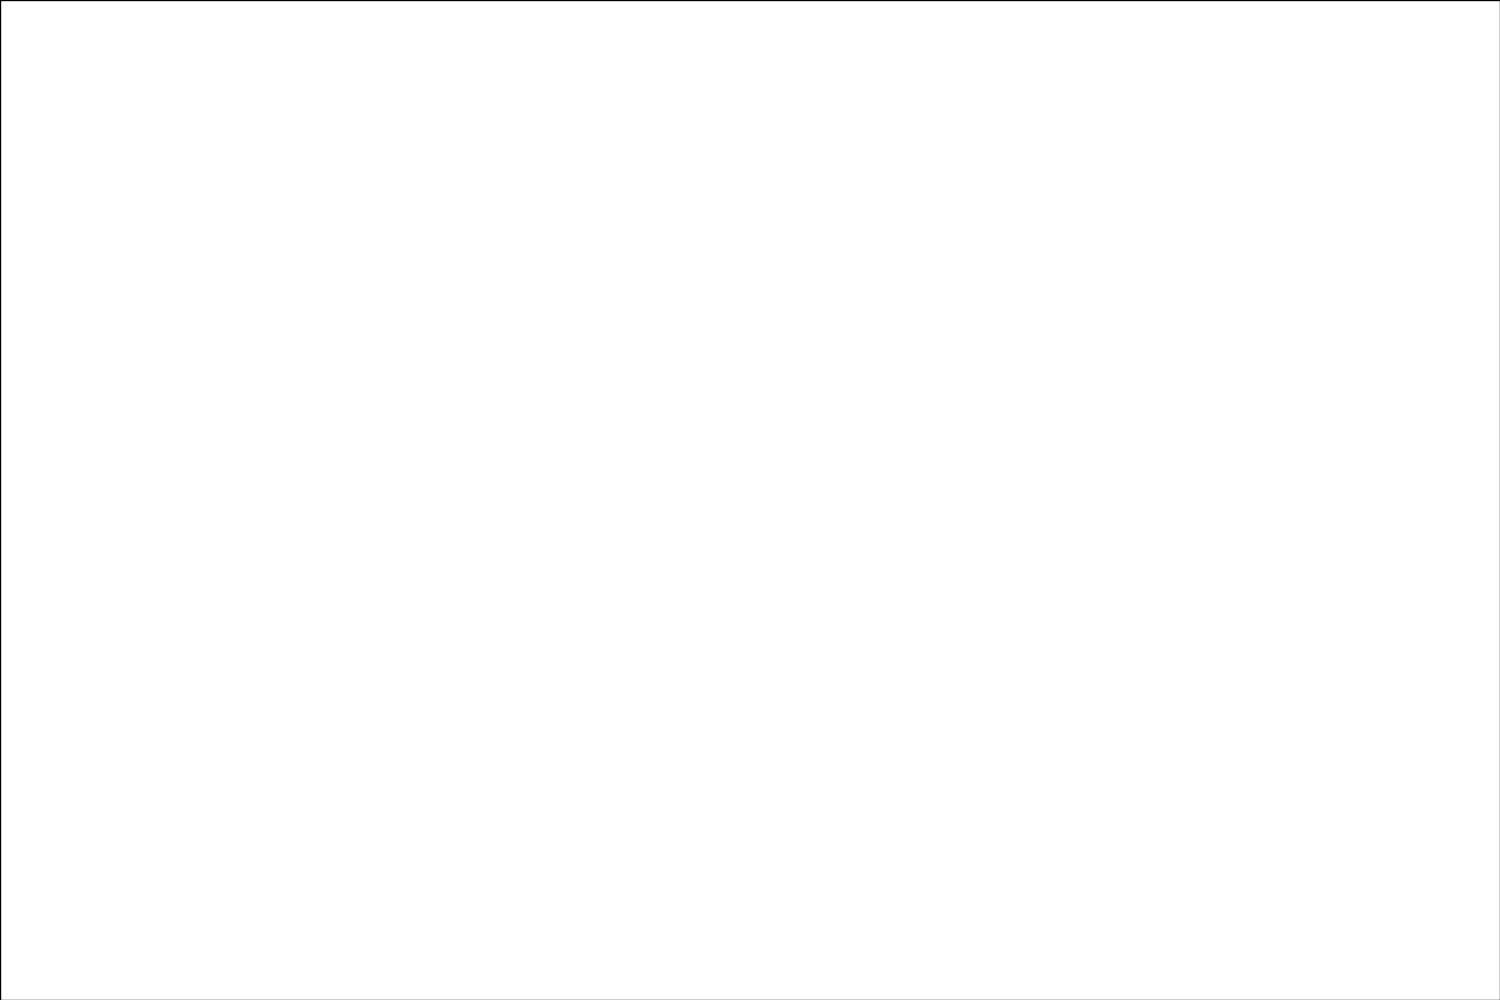

KeyboardInterrupt: 

In [107]:
plt.figure(figsize=(12, 8))

graph_options = {
    'node_color': 'lightblue',
    'node_size' : 10,
    "edge_color": 'black'
}

nx.draw(G, **graph_options)
plt.show()

On va tester une solution venu de stackoverflow:

In [110]:
from matplotlib import pylab
import networkx as nx

def save_graph(graph, file_name):
    #initialze Figure
    plt.figure(num=None, figsize=(20, 20), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    nx.draw_networkx_labels(graph,pos)

    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    plt.xlim(0, xmax)
    plt.ylim(0, ymax)

    plt.savefig(file_name,bbox_inches="tight")
    pylab.close()
    del fig

<IPython.core.display.Javascript object>


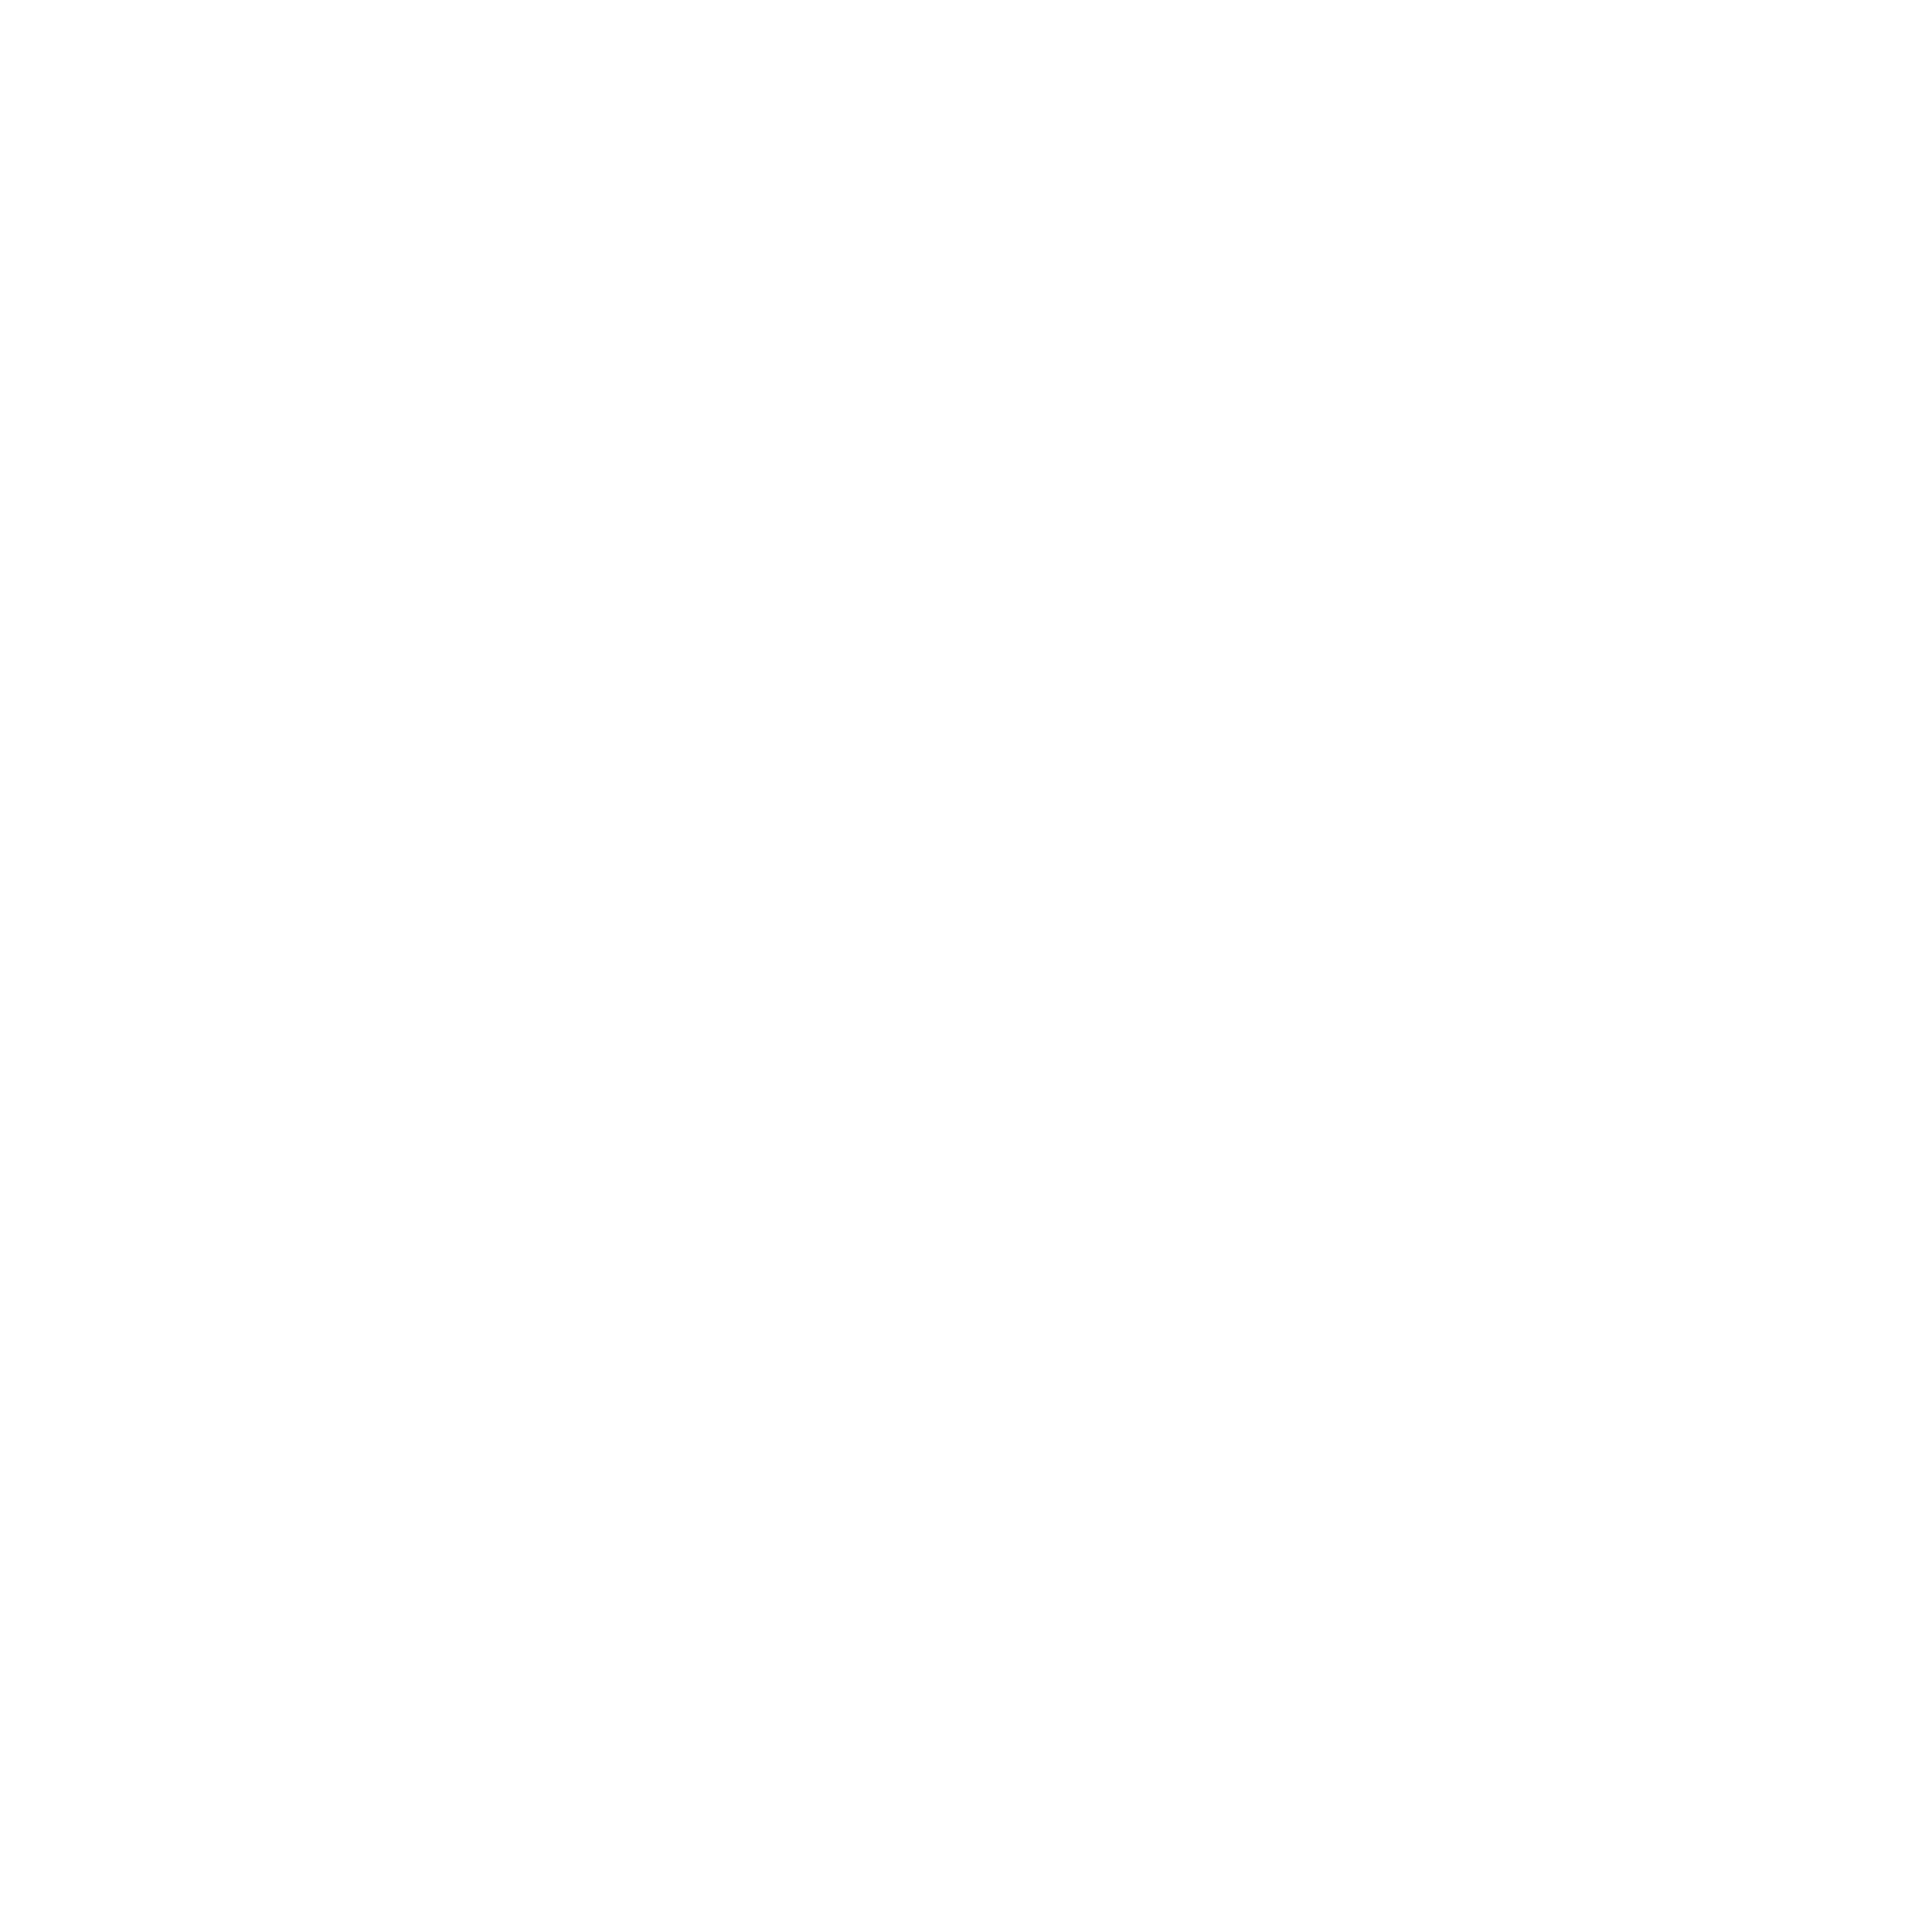

KeyboardInterrupt: 

In [111]:
#Assuming that the graph g has nodes and edges entered
save_graph(G,"my_graph_test.pdf")

On va essayer d'utiliser la librairie PyVis :
NON FONCTIONNEL

In [86]:
net = Network(notebook=True, cdn_resources="remote")

In [103]:
net.from_nx(G)

AssertionError: 

In [71]:
net.show("graph_2.html")

---

On va tester de faire une détection de communauté avec l'algo de Louvain

In [23]:
partition = community_louvain.best_partition(G)

In [30]:
len(set(partition.values()))

4382

In [25]:
len(partition)

35381

In [22]:
partition

{680200: 227,
 874827: 227,
 731211: 1,
 812638: 19,
 799330: 227,
 861196: 3,
 816303: 4,
 879881: 227,
 882850: 5,
 101034176: 1,
 779316: 6,
 823895: 5,
 744181: 227,
 875534: 227,
 101020259: 1,
 831339: 227,
 892142: 227,
 789013: 227,
 646456: 1,
 116026: 8,
 754658: 6,
 896311: 227,
 887191: 1,
 644167: 9,
 749952: 227,
 795925: 227,
 765140: 10,
 779990: 1,
 691473: 11,
 874889: 5,
 765394: 10,
 101026373: 227,
 653569: 1,
 674857: 227,
 872648: 12,
 101016216: 1,
 872706: 6,
 792306: 227,
 746451: 227,
 643368: 227,
 795937: 227,
 732163: 13,
 777500: 4,
 945393: 6,
 848109: 227,
 774293: 9,
 825700: 227,
 635122: 6,
 817884: 227,
 945406: 8,
 801127: 1,
 852457: 5,
 692014: 5,
 655295: 5,
 766566: 5,
 712821: 5,
 683289: 5,
 742068: 5,
 834302: 5,
 637675: 5,
 758003: 5,
 669982: 5,
 757957: 5,
 803258: 5,
 771776: 5,
 768524: 5,
 883759: 5,
 679787: 5,
 804098: 5,
 863934: 5,
 677770: 5,
 647204: 5,
 786672: 5,
 832848: 5,
 834531: 5,
 742422: 5,
 694097: 5,
 669179: 5,
 695

In [32]:
partition_sorted = dict(sorted(partition.items()))

In [34]:
partition_sorted = pd.DataFrame.from_dict(partition_sorted, orient="index").astype({0:"int32"})

In [35]:
project = project.join(partition_sorted, on="id")

In [36]:
project.rename({0:"Community"}, axis=1, inplace=True)

In [38]:
project.tail()

,id,acronym,status,title,startDate,endDate,totalCost,ecMaxContribution,legalBasis,topics,...,frameworkProgramme,masterCall,subCall,fundingScheme,nature,objective,contentUpdateDate,rcn,grantDoi,Community
35376,728611,NPX-101,CLOSED,NPX-101 is a portable home device for the trea...,2016-06-01,2016-09-30,71429,50000,H2020-EU.3.1.,SMEInst-06-2016-2017,...,H2020,H2020-SMEInst-2016-2017,H2020-SMEINST-1-2016-2017,SME-1,NaN,"Over 450 million individuals face depression, ...",2022-08-12 10:09:22,205010,10.3030/728611,17
35377,711323,CAREMIBRAIN,CLOSED,A new brain-dedicated Positron Emission Tomogr...,2016-06-01,2021-08-31,"4393596,25","4393596,25",H2020-EU.3.1.,PHC-12-2015,...,H2020,H2020-SMEInst-2014-2015,H2020-SMEINST-2-2015,SME-2,NaN,ONCOVISION is a Spanish SME specialised in des...,2022-06-13 11:50:31,204955,10.3030/711323,7
35378,837501,iProg,CLOSED,Tailored cell-based therapies for frontotempor...,2018-12-01,2019-05-31,71429,50000,H2020-EU.2.3.,EIC-SMEInst-2018-2020,...,H2020,H2020-EIC-SMEInst-2018-2020,H2020-SMEInst-2018-2020-1,SME-1,NaN,Sinfonia Biotherapeutics is a high-tech biotec...,2022-08-15 15:31:53,218862,10.3030/837501,2
35379,952030,WIRE 2020,SIGNED,WEEK OF INNOVATIVE REGIONS IN EUROPE 2020 : Th...,2019-12-02,2021-12-01,250000,250000,H2020-EU.4.f.,IBA-SEWP-WIRE-11-2020,...,H2020,H2020-IBA-SEWP-WIRE-11-2020,H2020-IBA-SEWP-WIRE-11-2020,CSA,NaN,A three-day online conference (WIRE XI or WIRE...,2022-09-04 00:43:47,227634,10.3030/952030,26
35380,814759,EUSP,CLOSED,Debate Science! European Student Parliament,2018-03-01,2018-10-31,100000,100000,H2020-EU.5.d.,IBA-SWAFS-Parliaments-2017,...,H2020,H2020-IBA-SWAFS-Parliaments-2017,H2020-IBA-SWAFS-Parliaments-2017,CSA,NaN,Wissenschaft im Dialog will organise a Europea...,2022-09-04 01:32:16,217751,10.3030/814759,6


Il manque la dernière valeur ! Il faut aussi modifier dtype de *Community* passer de float à int.

In [39]:
nx.set_node_attributes(G, partition, 'partition')

In [30]:
nx.write_gexf(G, "./graphs_save/graphe_1.gexf")

In [42]:
import random 
partitions = set(nx.get_node_attributes(G, 'partition').values())

# Sélection de quelques échantillons de chaque partition
sample_size = 2  # Nombre d'échantillons à sélectionner par partition
node_samples = {}  # Dictionnaire pour stocker les échantillons de chaque partition
for partition in partitions:
    # Récupération de la liste des noeuds appartenant à cette partition
    nodes = [node for node, data in G.nodes(data=True) if data['partition'] == partition]
    # Sélection aléatoire de quelques échantillons de cette liste
#     samples = random.sample(nodes, sample_size)
    samples = random.sample(nodes, min(sample_size, len(nodes)))
    # Ajout des échantillons au dictionnaire
    node_samples[partition] = samples

# Création d'un sous-graph avec les noeuds sélectionnés et leurs arcs
subgraph = G.subgraph(node_samples)

In [43]:
import itertools

# Création d'une liste de noeuds à inclure dans le sous-graph
nodes = list(itertools.chain(*node_samples.values()))
subgraph = G.subgraph(nodes)

In [ ]:
pos = nx.spring_layout(subgraph)  # Calcul des positions des noeuds
nx.draw(subgraph, pos, with_labels=True, node_size=800, font_size=12, font_weight='bold')
plt.show()